[*********************100%***********************]  1 of 1 completed
Buy at 170.3300018310547
Sell at 168.63999938964844
Buy at 172.7899932861328
Sell at 168.8800048828125
Buy at 168.82000732421875
Sell at 165.75
Buy at 170.39999389648438
Sell at 165.2899932861328
Buy at 162.50999450683594
Sell at 158.91000366210938
Buy at 163.42999267578125
Sell at 153.83999633789062


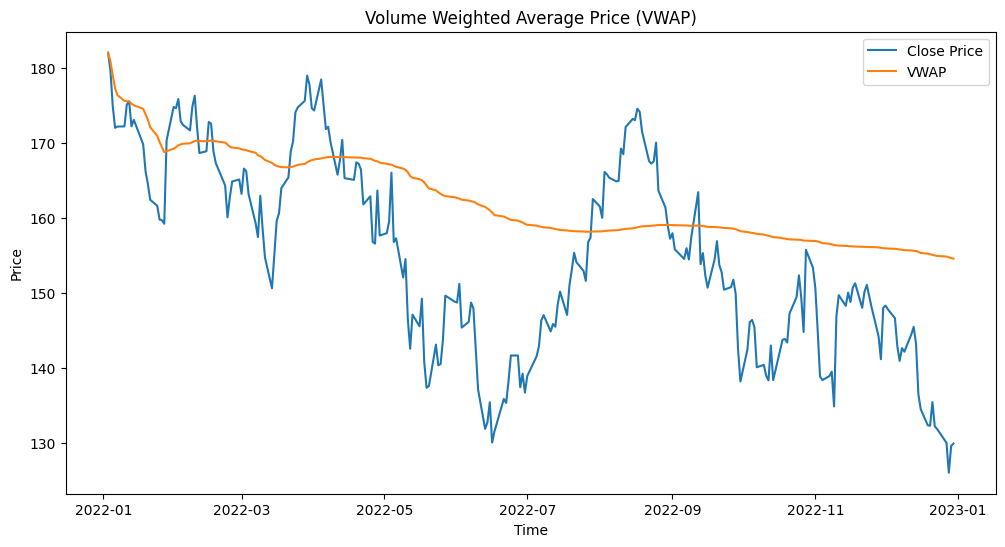

Total returns: -15.17%
Total profit: $-15171.00


In [1]:
# Volume Weighted Average Price (VWAP) Trading Strategy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate VWAP
def calculate_vwap(data):
    data['TPV'] = data['Close'] * data['Volume']
    data['Cumulative TPV'] = data['TPV'].cumsum()
    data['Cumulative Volume'] = data['Volume'].cumsum()
    data['VWAP'] = data['Cumulative TPV'] / data['Cumulative Volume']
    return data['VWAP']

# Fetch data from Yahoo Finance (replace 'AAPL' with your desired ticker symbol and adjust the start and end dates)
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')

# Calculate VWAP
data['VWAP'] = calculate_vwap(data)

# Initialize variables
position = 0  # 0 = out of position, 1 = long position
capital = 100000  # Initial capital in USD
shares = 0  # Number of shares held
buy_price = 0  # Price at which shares were bought
returns = []  # List to store daily returns

# Define the trading strategy
for i in range(1, len(data)):
    if data['Close'][i] > data['VWAP'][i] and position == 0:
        # Buy signal
        shares = capital / data['Close'][i]
        buy_price = data['Close'][i]
        position = 1
        print(f"Buy at {data['Close'][i]}")

    elif data['Close'][i] < data['VWAP'][i] and position == 1:
        # Sell signal
        capital = shares * data['Close'][i]
        returns.append((capital - (shares * buy_price)) / (shares * buy_price))
        shares = 0
        position = 0
        print(f"Sell at {data['Close'][i]}")

# Calculate total returns and profit
total_returns = (capital - 100000) / 100000
total_profit = capital - 100000

# Plotting the VWAP and Close prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['VWAP'], label='VWAP')
plt.title('Volume Weighted Average Price (VWAP)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print performance metrics
print(f"Total returns: {total_returns * 100:.2f}%")
print(f"Total profit: ${total_profit:.2f}")